# Beijing Air Quality(Time Series) Data Analysis 

This is part-1 and part-2 of the tutorials on Time Series Modelling and Analysis by [AI Engineering Youtube Playlist](https://www.youtube.com/playlist?list=PL3N9eeOlCrP5cK0QRQxeJd6GrQvhAtpBK) 


In [1]:
# Basic imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The data is taken from [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data). This hourly data of the air-quality contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included. The data time period is between Jan 1st, 2010 to Dec 31st, 2014. 

In [2]:
data = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv')

In [3]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


Here the PM2.5 is our target variable captured every hour. It stands for Particulant Matter 2.5mm in diameter. This contaminent can affect the respiratory system thereby causing health problems. Many countries track this value over time and provide the air-quality index.
  
Since the target is varied with respect to time(year, month, day, hour), let's combine them for better analysis.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
from datetime import datetime

def convert_to_datetime(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [6]:
data = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year','month','day','hour']], date_parser=convert_to_datetime, keep_date_col=True)

In [7]:
data.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

Now the date_time columns is of type datetime64 and not int64. Since the month is of type object, lets change it to int64 as it will help in plotting.

In [9]:
data['month'] = pd.to_numeric(data['month'])

data.columns = data.columns.str.replace('year_month_day_hour','date_time')

In [10]:
# Simple analysis

print('Rows: {}'.format(data.shape[0]))
print('Columns: {}'.format(data.shape[1]))
print('\nFeatures: {}\n'.format(data.columns.to_list()))

Rows: 35064
Columns: 19

Features: ['date_time', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']



In [11]:
# Holding a copy of data

data_copy = data.copy()
data.set_index('date_time', inplace = True)

In [12]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date_time,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


Usually statistical analysis is not much effective in time-series but there can be some information derived from it.

In [13]:
data.describe()

,No,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,6.522930,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,3.448752,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,1.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,4.000000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,7.000000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,10.000000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,12.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Here, the temperature column 'TEMP' has a maximum temperature of 41(Summer time in Beijing) and minimum temperature of -16(Winter..). Also the target variable PM2.5 has a minimum value of 3 and maximum value of 881 while the median is 41!(881 is pretty high)

### EDA

Segregate the target variable to another dataframe for visual analysis

In [14]:
pm_data = data['PM2.5']

pm_data.head()

date_time
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

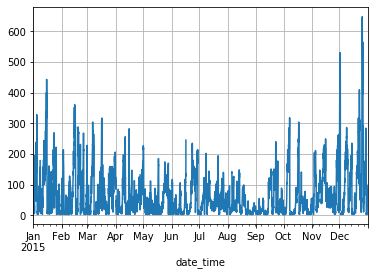

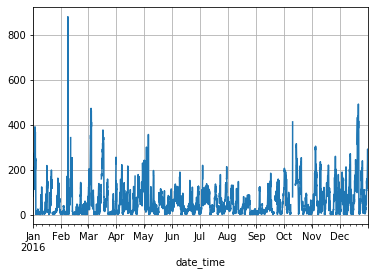

In [15]:
pm_data['2015'].plot(grid = True)
plt.show()
pm_data['2016'].plot(grid = True)

##### Insight:
    Comparing both plots, there seems to be a seasonality trend in PM2.5. It is higher in winter months (Oct, Nov, Dec, Jan, Feb..) and is a bit lower during summer(June, July, Aug). 
    
Let's try to visualize both the plots in a single figure

In [16]:
df_2015 = data['2015'].reset_index()
df_2016 = data['2016'].reset_index()

# Let's visualize per month and remove the hourly data
df_2015['month_day'] = df_2015.apply(lambda x: str(str(x['month'])+'-'+x['day']), axis = 1) 
df_2016['month_day'] = df_2016.apply(lambda x: str(str(x['month'])+'-'+x['day']), axis = 1)

Text(0.5, 1.0, 'Air quality plots for year 2015 and 2016')

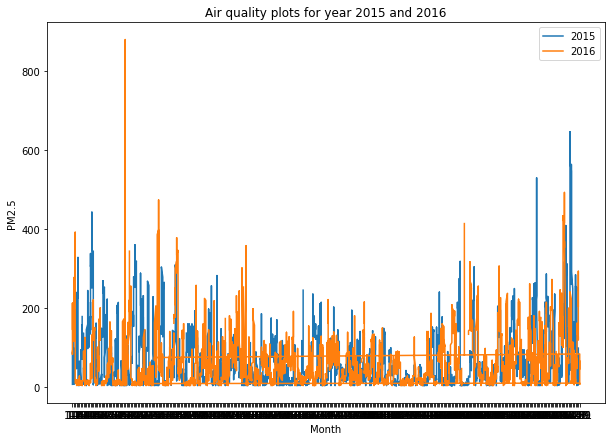

In [17]:
plt.figure(figsize = (10,7))
plt.plot(df_2015['month_day'], df_2015['PM2.5'])
plt.plot(df_2016['month_day'], df_2016['PM2.5'])
plt.legend(['2015', '2016'])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Air quality plots for year 2015 and 2016')

###### Insight:
    Trends show seasonality as explained before...
Let's also check this by performing statistical analysis within the particular time-frame

       PM2.5  TEMP      
         max   max   min
month                   
1      443.0  12.0 -16.6
2      881.0  14.0 -10.0
3      474.0  23.7  -6.4
4      282.0  32.0   1.3
5      358.0  33.8   7.0
6      245.0  38.1  16.0
7      221.0  39.2  16.8
8      149.0  36.3  17.1
9      240.0  32.0   7.8
10     414.0  28.1  -1.4
11     306.0  20.8 -10.3
12     647.0  11.0  -9.7


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf71349e90>,
      dtype=object)

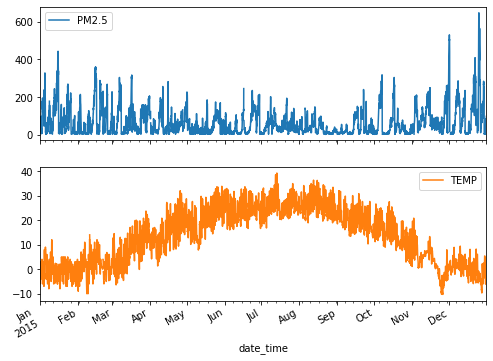

In [18]:
print(data['2015':'2016'][['month','PM2.5','TEMP']].groupby('month').agg({'PM2.5':max,'TEMP':[max, min]}))

data['2015'][['PM2.5','TEMP']].plot(subplots = True, figsize = (8,6))

Here its pretty clear that the air quality is pretty bad in winter months then in summer months.

##### Lag Plots

lag plots (special type of scatter plots, where we plot x = current time, y = lag period. By default lag period = 1, also called first order lag plot) helps in understanding the correlation wrt different time stamps!
  
Linear shape in lag plot suggests that auto-regressive model is a better choice..

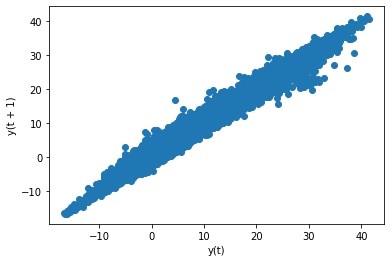

In [19]:
pd.plotting.lag_plot(data['TEMP'])

###### Insight:
    wrt an hour change in time, there isnt much variation in temperature

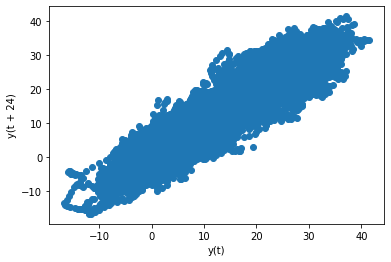

In [20]:
pd.plotting.lag_plot(data['TEMP'], lag = 24) #24 hour change in between!

###### Insight:
    Data is still spread towards the centre but its not as correlated as lag=1 plot. 

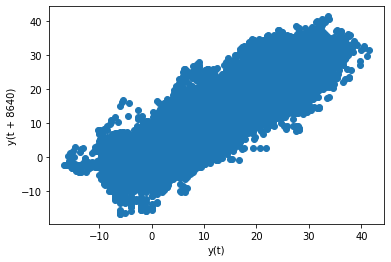

In [21]:
# Let's plot for yearly duration
pd.plotting.lag_plot(data['TEMP'], lag = 8640) #24 * 365 days!

##### Insight:
    Data is still linearly corelated (upward trend, seasonality). 

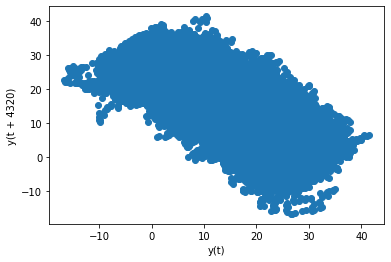

In [22]:
# Let's plot for 6 months duration
pd.plotting.lag_plot(data['TEMP'], lag = 4320) #half-a year

##### Insight:
    Data is now linearly down-correlated (temperature changes ~ summer, winter scenario)

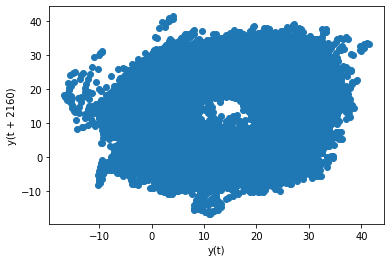

In [23]:
# Let's plot for a duration of 3 months
pd.plotting.lag_plot(data['TEMP'], lag = 2160) 

###### Insight:
    Data is completely spreadout! No correlation...
    
Let's check how the features are corelated with our target variable.

In [24]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [25]:
data_corr = data[['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5']].corr(method = 'pearson')
data_corr

,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,PM2.5
SO2,1.000000,0.610433,0.529182,-0.182096,-0.312980,0.245297,-0.284595,-0.040201,0.475117
NO2,0.610433,1.000000,0.798753,-0.373625,-0.316337,0.200609,-0.109579,-0.032778,0.718170
CO,0.529182,0.798753,1.000000,-0.303275,-0.282312,0.172220,-0.031765,-0.004138,0.802737
O3,-0.182096,-0.373625,-0.303275,1.000000,0.589474,-0.457838,0.316821,0.029867,-0.100542
TEMP,-0.312980,-0.316337,-0.282312,0.589474,1.000000,-0.837844,0.823684,0.035177,-0.089939
PRES,0.245297,0.200609,0.172220,-0.457838,-0.837844,1.000000,-0.765659,-0.058766,-0.008005
DEWP,-0.284595,-0.109579,-0.031765,0.316821,0.823684,-0.765659,1.000000,0.090351,0.134558
RAIN,-0.040201,-0.032778,-0.004138,0.029867,0.035177,-0.058766,0.090351,1.000000,-0.009221
PM2.5,0.475117,0.718170,0.802737,-0.100542,-0.089939,-0.008005,0.134558,-0.009221,1.000000


##### Insight:
    1. NO2, CO are correlated wrt target variable (PM2.5)
    2. TEMP and PRES are highly non-correlated (It's obvious that whenever temparature is high, pressure is low and vice versa)
    3. DEWP and TEMP are highly correlated.

### Handling Missing Value

In [26]:
data.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Let's consider only one column ['TEMP'] for figuring out the imputation strategies. The strategy depends on the domain knowledge!  
Let's only consider for a year consisting of NULL values in TEMP column.

In [28]:
data[data['TEMP'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date_time,,,,,,,,,,,,,,,,,,
2015-01-27 20:00:00,16749,2015,1,27,20,39.0,43.0,28.0,34.0,1100.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-01-30 13:00:00,16814,2015,1,30,13,15.0,19.0,19.0,5.0,400.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-01-31 05:00:00,16830,2015,1,31,5,5.0,11.0,32.0,8.0,400.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-02 01:00:00,16874,2015,2,2,1,60.0,60.0,30.0,39.0,2600.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-02 11:00:00,16884,2015,2,2,11,138.0,138.0,52.0,73.0,2200.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-04 10:00:00,16931,2015,2,4,10,8.0,8.0,13.0,5.0,200.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-04 13:00:00,16934,2015,2,4,13,13.0,16.0,14.0,3.0,300.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-07 15:00:00,17008,2015,2,7,15,3.0,24.0,2.0,2.0,200.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-08 14:00:00,17031,2015,2,8,14,4.0,5.0,7.0,2.0,200.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling


In [36]:
# Conidering only the year '2016', september as this month has null values!

data_imp = data.loc['2016-09-25 10' : '2016-09-25 23'][['TEMP']]

In [37]:
data_imp

,TEMP
date_time,
2016-09-25 10:00:00,21.600
2016-09-25 11:00:00,21.550
2016-09-25 12:00:00,21.750
2016-09-25 13:00:00,22.700
2016-09-25 14:00:00,23.000
2016-09-25 15:00:00,23.975
2016-09-25 16:00:00,24.250
2016-09-25 17:00:00,23.875
2016-09-25 18:00:00,23.600


###### Case - 1

Forward fill. It's posible to use the pandas forward fill method to fill in the temperature values. (assuming there wont be much change in temperatures within the hour!)

In [38]:
data_imp['temp_ffill'] = data_imp['TEMP'].fillna(method = 'ffill')

###### Case - 2
Backward fill. There are some scenarios where backward fill could also be applied..(not much used in applications as Null value could propagate) 

In [41]:
data_imp['temp_bfill'] = data_imp['TEMP'].fillna(method = 'bfill')

###### Case - 3

Rolling window. Pandas rolling window helps in imputing with mean of chosen period!
Eg: Here the temperature with NaN value is replace by the mean of the adjacent two period. 

In [44]:
data_imp['temp_rolling'] = data_imp['TEMP'].rolling(window = 2, min_periods = 1).mean()

###### Case - 4
Previous year data!. Use pandas offset function to get the previous year data and replace 

In [48]:
data.loc[data_imp.index + pd.offsets.DateOffset(years=-1)]['TEMP'] # These are data from previous year (september 2015)

date_time
2015-09-25 10:00:00    22.3
2015-09-25 11:00:00    23.4
2015-09-25 12:00:00    24.1
2015-09-25 13:00:00    24.6
2015-09-25 14:00:00    25.3
2015-09-25 15:00:00    25.7
2015-09-25 16:00:00    25.9
2015-09-25 17:00:00    25.4
2015-09-25 18:00:00    22.6
2015-09-25 19:00:00    18.2
2015-09-25 20:00:00    16.9
2015-09-25 21:00:00    15.0
2015-09-25 22:00:00    14.3
2015-09-25 23:00:00    13.9
Freq: H, Name: TEMP, dtype: float64

In [49]:
data_imp = data_imp.reset_index()

In [62]:
data_imp['prev_yr_temp'] = data_imp.apply(lambda x: data.loc[x['date_time'] + pd.offsets.DateOffset(years=-1)]['TEMP'] if pd.isna(x['TEMP']) else x['TEMP'], axis = 1) # 2015 data gets imputed 

# for forward year, use subtraction. i.e., x['date_time'] - pd.offsets.DateOffset(years=-1) #2017

In [63]:
data_imp

,date_time,TEMP,temp_ffill,temp_bfill,temp_rolling,prev_yr_temp
0,2016-09-25 10:00:00,21.600,21.600,21.600,21.6000,21.600
1,2016-09-25 11:00:00,21.550,21.550,21.550,21.5750,21.550
2,2016-09-25 12:00:00,21.750,21.750,21.750,21.6500,21.750
3,2016-09-25 13:00:00,22.700,22.700,22.700,22.2250,22.700
4,2016-09-25 14:00:00,23.000,23.000,23.000,22.8500,23.000
5,2016-09-25 15:00:00,23.975,23.975,23.975,23.4875,23.975
6,2016-09-25 16:00:00,24.250,24.250,24.250,24.1125,24.250
7,2016-09-25 17:00:00,23.875,23.875,23.875,24.0625,23.875
8,2016-09-25 18:00:00,23.600,23.600,23.600,23.7375,23.600
9,2016-09-25 19:00:00,NaN,23.600,NaN,23.6000,18.200


###### Insights:
    1. When the NULL values are continuous in the column (index 9 to 13 and 13 being the last row), backward fill and rolling window are poor methods to impute!
    2. Forward fill did replace the null value but this might not be an accurate imputation.. There might be vary in the temperatures in some cities!
    3. Imputing NULL with previous year data was successful. But there might be posiblity that due to natural disasters or global warming the temperatures might vary from year to year.. or there might be a posibility that even the adjacent year datas arent captured!